# 1. Importing Libraries

In [18]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing Data

In [2]:
# create a path to datasets
path = r'/Users/tuyetnguyen/Desktop/Career Foundry/Achievement 4/04-2023 Instacart Basket Analysis'

In [3]:
# import your most up-to-date project data
ords_prods_custs_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_customers_merge.pkl'))

In [4]:
# take a look at the data 
ords_prods_custs_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


In [5]:
ords_prods_custs_merge.shape

(32404859, 32)

##### 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).


##### 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

Please refer to notebook 4.9 (Follow along) Intro to Data Visualization with Python

##### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

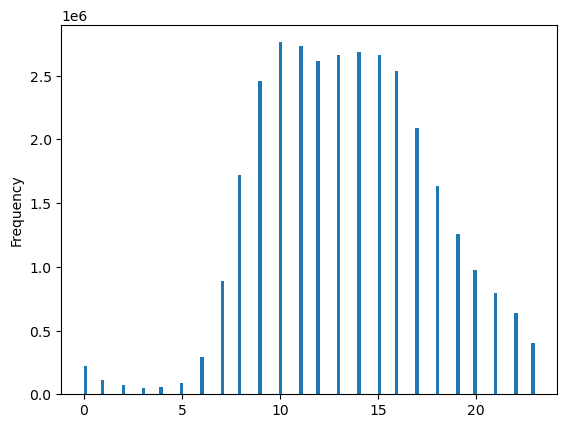

In [34]:
# create a histogram of the “order_hour_of_day” column
hist = ords_prods_custs_merge['order_hour_of_day'].plot.hist(bins = 132)

The histogram depicts the variation in sales throughout the day.
- The sales are lowest between 0-5 am.
- The majority of sales are recorded between 9:00 am and 5:00 pm. 
- Sales gradually decline after 5:00 pm.


##### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

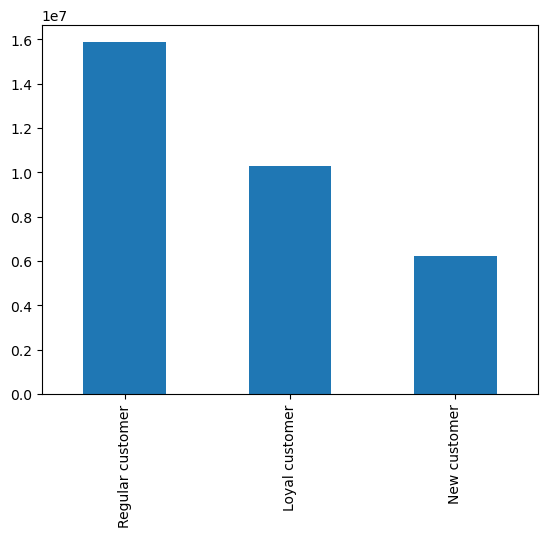

In [7]:
bar_loyalty = ords_prods_custs_merge['loyalty_flag'].value_counts().plot.bar()

##### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

###### Sampling data

In [8]:
# set the seed
np.random.seed(4)

In [10]:
# crate a list called 'dev' to hold True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_custs_merge)) <= 0.7

In [11]:
# store 70% of the sample in the dataframe 'big'
big = ords_prods_custs_merge[dev]

In [12]:
# store 30% of the sample in the dataframe 'small'
small = ords_prods_custs_merge[~dev]

In [13]:
# check the result
len(ords_prods_custs_merge) == len(big) + len(small)

True

In [15]:
# reduce the samples to only those columns necessary for the chart, namely “prices” and “orders_hour_of_day.”
df_2 = small[['order_hour_of_day', 'prices']]

###### Creating A Line Chart

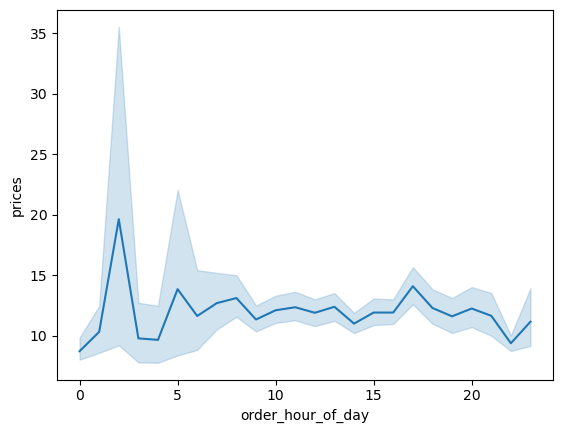

In [19]:
# create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

##### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.


In [20]:
# import the customers_cleaned data set
df_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customers_cleaned.pkl'))

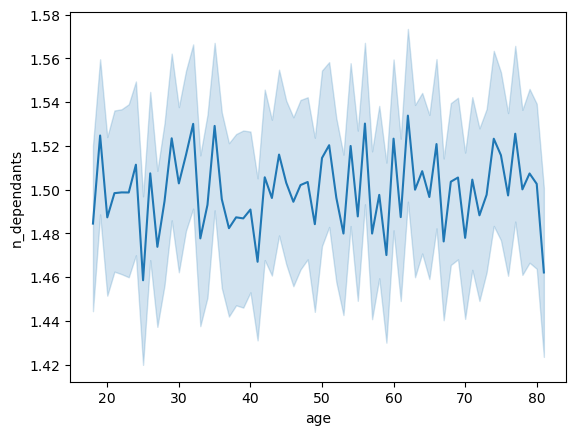

In [35]:
line_2 = sns.lineplot(data = df_customers, x = 'age', y = 'n_dependants')

There's no relationship between age and number of dependants. 

##### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


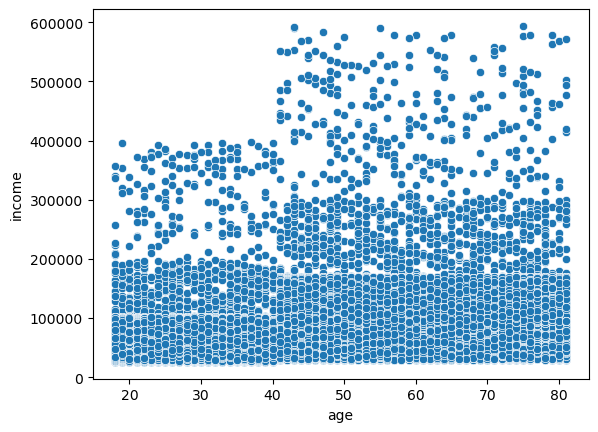

In [23]:
scatterplot = sns.scatterplot(x = 'age', y = 'income', data = df_customers)

Most customers have an income of less than 200K , and their income tends to increase with age. Customers over 40 are more likely to have an income between U.S. 200K and 300K dollars compared to younger customers. Furthermore, an income of 400K or more is only found among customers over 40.

##### 8. Export your visualizations as “.png” files in your relevant project folder.

In [36]:
# export the bar chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [37]:
# export the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

In [38]:
# export the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_day_prices.png'))

In [39]:
# export the line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [40]:
# export the scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

##### 9. Save your notebook from part 2 of this Exercise’s task.
##### 10. Submit your notebooks for both the first and second parts of this task to your tutor for review.